In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open database connection
db = pymysql.connect("localhost","root","password",'sakila' )


In [3]:

# prepare a cursor object using cursor() method
cursor = db.cursor()


In [4]:
databases = ("SHOW databases")
cursor.execute(databases)
for (databases) in cursor:
     print(databases[0])

classicmodels
inclass
information_schema
ipl
mavenfuzzyfactory
miniprojectoct
mysql
performance_schema
production
sakila
sales
sys


In [5]:

# execute SQL query using execute() method.
cursor.execute("SELECT VERSION()")


1

In [6]:

# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print ("Database version : %s " % data)


Database version : 8.0.21 


# Theme
You are the store Data Analyst and Kirk is an investor 
looking to buy the stores. He has a few queries that would like 
to get answers for.



1. Kirk Gopal is looking to meet the staff in each store, let him know the address to meet them

In [7]:
staff_address = pd.read_sql('''
SELECT 
	staff.first_name AS manager_first_name, 
    staff.last_name AS manager_last_name,
    address.address, 
    address.district, 
    city.city, 
    country.country

FROM store
	LEFT JOIN staff ON store.manager_staff_id = staff.staff_id
    LEFT JOIN address ON store.address_id = address.address_id
    LEFT JOIN city ON address.city_id = city.city_id
    LEFT JOIN country ON city.country_id = country.country_id

''', db);


In [8]:
staff_address.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   manager_first_name  2 non-null      object
 1   manager_last_name   2 non-null      object
 2   address             2 non-null      object
 3   district            2 non-null      object
 4   city                2 non-null      object
 5   country             2 non-null      object
dtypes: object(6)
memory usage: 224.0+ bytes


In [9]:
staff_address

,manager_first_name,manager_last_name,address,district,city,country
0,Mike,Hillyer,47 MySakila Drive,Alberta,Lethbridge,Canada
1,Jon,Stephens,28 MySQL Boulevard,QLD,Woodridge,Australia


2. Kirk want to understand the inventory is in terms of replacement cost. He wants to see the impact 
if a certain category of film became unpopular at a certain store. He would like to see the number of films, 
as well as the average replacement cost, and total replacement cost, sliced by store and film category. 


In [10]:
replacement_cost = pd.read_sql('''
SELECT 
	store_id, 
    category.name AS category, 
	COUNT(inventory.inventory_id) AS films, 
    AVG(film.replacement_cost) AS avg_replacement_cost, 
    SUM(film.replacement_cost) AS total_replacement_cost
    
FROM inventory
	LEFT JOIN film
		ON inventory.film_id = film.film_id
	LEFT JOIN film_category
		ON film.film_id = film_category.film_id
	LEFT JOIN category
		ON category.category_id = film_category.category_id

GROUP BY 
	store_id, 
    category.name
    
ORDER BY
    store_id,
    category.name,
	SUM(film.replacement_cost) DESC
''', db);


In [11]:
replacement_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   store_id                32 non-null     int64  
 1   category                32 non-null     object 
 2   films                   32 non-null     int64  
 3   avg_replacement_cost    32 non-null     float64
 4   total_replacement_cost  32 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


Text(0, 0.5, 'Frequency')

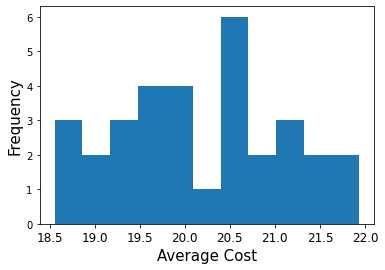

In [12]:
replacement_cost['avg_replacement_cost'].hist(bins =11, grid = False, xlabelsize = 12)
plt.xlabel('Average Cost',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

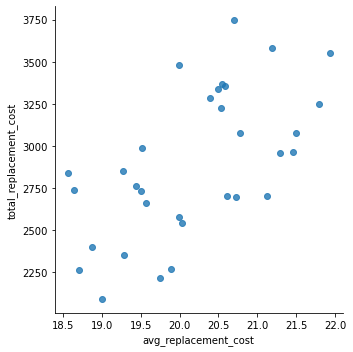

In [13]:
sns.lmplot('avg_replacement_cost', 'total_replacement_cost', data=replacement_cost, fit_reg=False)


3. Kirk wants to the customer demographics. Please provide a list 
of all customer names, which store they go to, whether or not they 
are currently active, and their full addresses. 

In [14]:
customers = pd.read_sql('''
SELECT 
	customer.first_name, 
    customer.last_name, 
    customer.store_id,
    customer.active, 
    address.address, 
    city.city, 
    country.country

FROM customer
	LEFT JOIN address ON customer.address_id = address.address_id
    LEFT JOIN city ON address.city_id = city.city_id
    LEFT JOIN country ON city.country_id = country.country_id
;

''', db);


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  599 non-null    object
 1   last_name   599 non-null    object
 2   store_id    599 non-null    int64 
 3   active      599 non-null    int64 
 4   address     599 non-null    object
 5   city        599 non-null    object
 6   country     599 non-null    object
dtypes: int64(2), object(5)
memory usage: 32.9+ KB


In [16]:
customers.head(2)

,first_name,last_name,store_id,active,address,city,country
0,MARY,SMITH,1,1,1913 Hanoi Way,Sasebo,Japan
1,PATRICIA,JOHNSON,1,1,1121 Loja Avenue,San Bernardino,United States



4. Kirk would like to understand how much customers are 
spending with you, and also to know who your most top paying 
customers are.


In [17]:
customer_spend = pd.read_sql('''
SELECT 
	customer.first_name, 
    customer.last_name, 
    COUNT(rental.rental_id) AS total_rentals, 
    SUM(payment.amount) AS total_payment_amount

FROM customer
	LEFT JOIN rental ON customer.customer_id = rental.customer_id
    LEFT JOIN payment ON rental.rental_id = payment.rental_id

GROUP BY 
	customer.first_name,
    customer.last_name

ORDER BY 
	SUM(payment.amount) DESC
    ;
''', db);


In [18]:
customer_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            599 non-null    object 
 1   last_name             599 non-null    object 
 2   total_rentals         599 non-null    int64  
 3   total_payment_amount  599 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.8+ KB


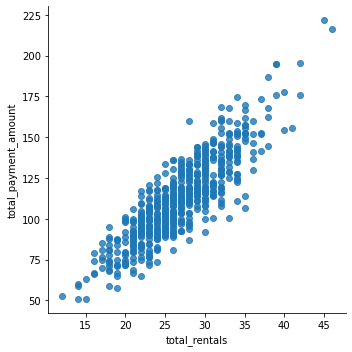

In [19]:
sns.lmplot('total_rentals', 'total_payment_amount', data=customer_spend, fit_reg=False)

5.How is the length of the movie related to the movie rating, rental duration and rental rate set by the store? 


In [20]:
movie_data = pd.read_sql('''
SELECT
	rating AS movie_rating,
	AVG(length) AS avg_movie_length,
    AVG(rental_duration) AS avg_rental_duration,
    AVG(rental_rate) AS avg_rental_rate
FROM film
GROUP BY 1
ORDER BY 2,3;

''', db);


In [21]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_rating         5 non-null      object 
 1   avg_movie_length     5 non-null      float64
 2   avg_rental_duration  5 non-null      float64
 3   avg_rental_rate      5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes


In [22]:
movie_data

,movie_rating,avg_movie_length,avg_rental_duration,avg_rental_rate
0,G,111.0506,4.8371,2.888876
1,PG,112.0052,5.0825,3.051856
2,NC-17,113.2286,5.1429,2.970952
3,R,118.6615,4.7744,2.938718
4,PG-13,120.4439,5.0538,3.034843


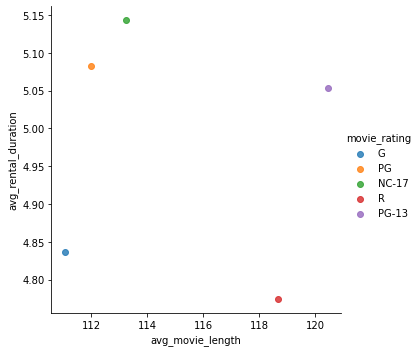

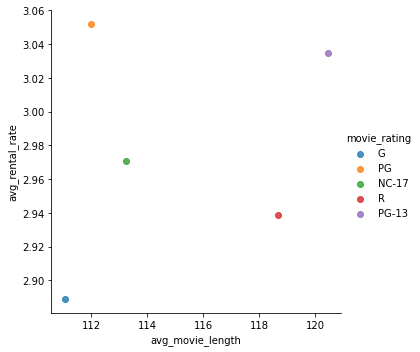

In [23]:
sns.lmplot('avg_movie_length', 'avg_rental_duration', data=movie_data, hue = 'movie_rating', fit_reg=False)
sns.lmplot('avg_movie_length', 'avg_rental_rate', data=movie_data, hue = 'movie_rating', fit_reg=False)

-- 6. Which category of movie is the longest and does this have any relationship with rental rate? 

In [24]:
category_rental = pd.read_sql('''
SELECT
	c.name AS category,
	AVG(f.length) AS avg_length,
    AVG(f.rental_rate) AS avg_rental_rate
FROM film AS f
	LEFT JOIN film_category AS fc
		ON f.film_id = fc.film_id
	LEFT JOIN category AS c
		ON c.category_id = fc.category_id
GROUP BY c.name
ORDER BY 2 DESC,3 DESC;

''', db);


In [25]:
category_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         16 non-null     object 
 1   avg_length       16 non-null     float64
 2   avg_rental_rate  16 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


In [26]:
category_rental

,category,avg_length,avg_rental_rate
0,Sports,128.2027,3.125135
1,Games,127.8361,3.252295
2,Foreign,121.6986,3.099589
3,Drama,120.8387,3.022258
4,Comedy,115.8276,3.162414
5,Family,114.7826,2.758116
6,Music,113.6471,2.950784
7,Travel,113.3158,3.235614
8,Horror,112.4821,3.025714
9,Classics,111.6667,2.744386


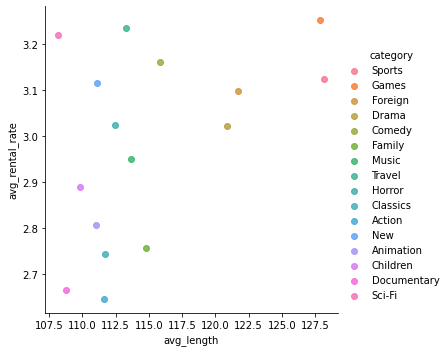

In [27]:
sns.lmplot('avg_length', 'avg_rental_rate', 
           data=category_rental, hue = 'category', fit_reg=False)

7. Which actor has best average rental rate for his/ her movie? 

In [28]:
actor_rental = pd.read_sql('''
SELECT
	a.actor_id AS actor_id,
    CONCAT(a.first_name,' ',a.last_name) As actor_name,
    AVG(f.rental_rate) AS avg_rental_rate
    
FROM film AS f
	LEFT JOIN film_actor AS fa
		ON fa.film_id = f.film_id
	LEFT JOIN actor AS a
		ON a.actor_id = fa.actor_id
GROUP BY 1
ORDER BY 3 DESC
LIMIT 1;
''', db);


In [29]:
actor_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   actor_id         1 non-null      int64  
 1   actor_name       1 non-null      object 
 2   avg_rental_rate  1 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 152.0+ bytes


In [30]:
actor_rental

,actor_id,actor_name,avg_rental_rate
0,134,GENE HOPKINS,3.808182


8. Which category (genre or rating) of film has the most rentals, and does this have to do anything with the length of the film? 

In [31]:
rating_rental_length = pd.read_sql('''
SELECT
	f.rating AS rating,
	COUNT(DISTINCT r.rental_id) AS number_of_rentals,
    f.length AS film_length
FROM rental AS r
	LEFT JOIN inventory AS i
		ON i.inventory_id = r.inventory_id
	LEFT JOIN film AS f
		ON f.film_id = i.film_id
GROUP BY 
	f.rating,
    f.length
ORDER BY 2 DESC, 3 DESC;
''', db);


In [32]:
rating_rental_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rating             535 non-null    object
 1   number_of_rentals  535 non-null    int64 
 2   film_length        535 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.7+ KB


In [33]:
rating_rental_length.head(5)

,rating,number_of_rentals,film_length
0,PG-13,160,178
1,NC-17,107,92
2,R,98,84
3,PG,93,85
4,PG,91,114


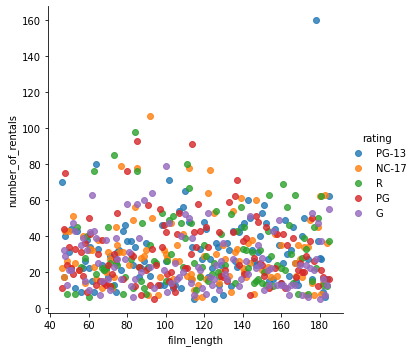

In [34]:
sns.lmplot('film_length', 'number_of_rentals',  data=rating_rental_length,
           hue = 'rating', fit_reg=False)

9. What are the top 5 earning genre or rating of films rented by the customers per store - count and revenue? 

In [35]:
genre_revenue = pd.read_sql('''
SELECT
	s.store_id AS store_id,
	c.name AS genre,
    COUNT(DISTINCT r.rental_id) AS rentals,
	SUM(p.amount) AS revenue
FROM store AS s
	LEFT JOIN inventory AS i
		ON i.store_id = s.store_id
	LEFT JOIN film AS f
		ON f.film_id = i.film_id
	LEFT JOIN film_category AS fc
		ON f.film_id = fc.film_id
	LEFT JOIN category As c
		ON fc.category_id = c.category_id
	LEFT JOIN rental AS r
		ON i.inventory_id = r.inventory_id
	LEFT JOIN payment AS p
		ON p.rental_id = r.rental_id
GROUP BY
	s.store_id,
    c.name
ORDER BY 1, 3 DESC,4 DESC;
''', db);


In [36]:
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   store_id  32 non-null     int64  
 1   genre     32 non-null     object 
 2   rentals   32 non-null     int64  
 3   revenue   32 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


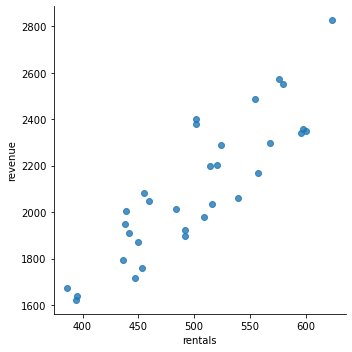

In [37]:
sns.lmplot('rentals', 'revenue', data=genre_revenue, fit_reg=False)

In [38]:

# disconnect from server
db.close()

10. What are the top earning film genres for stocking accordingly?

In [39]:
df1 = pd.read_sql('''
WITH rental_enriched
AS
(
SELECT
	r.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    c.email,
    ROUND((TIMESTAMPDIFF(HOUR, (LAG (r.rental_date) OVER (PARTITION BY r.customer_id ORDER BY r.rental_date)), r.rental_date))/24, 2) AS days_between_rentals,
    ROUND((TIMESTAMPDIFF(HOUR, r.rental_date, r.return_date))/24, 2) AS rental_period
 
FROM
	rental r
    INNER JOIN customer c ON r.customer_id = c.customer_id
),
rental_summary AS
(
SELECT
	customer_id,
    customer_name,
    email,
    AVG(days_between_rentals) AS avg_days_between_rentals,
    AVG(rental_period) AS avg_days_rental_period,
    COUNT(customer_id) AS no_of_rentals
FROM
	rental_enriched
GROUP BY
	customer_id
)
SELECT
customer_id,
customer_name,
email,
avg_days_between_rentals,
avg_days_rental_period,
(CASE WHEN avg_days_between_rentals < avg_days_rental_period THEN 'Multi rentals' ELSE 'Non-Multi rentals' END) AS customer_rental_type
FROM rental_summary
GROUP BY
customer_id;

''', db);

DatabaseError: Execution failed on sql: 
WITH rental_enriched
AS
(
SELECT
	r.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    c.email,
    ROUND((TIMESTAMPDIFF(HOUR, (LAG (r.rental_date) OVER (PARTITION BY r.customer_id ORDER BY r.rental_date)), r.rental_date))/24, 2) AS days_between_rentals,
    ROUND((TIMESTAMPDIFF(HOUR, r.rental_date, r.return_date))/24, 2) AS rental_period
 
FROM
	rental r
    INNER JOIN customer c ON r.customer_id = c.customer_id
),
rental_summary AS
(
SELECT
	customer_id,
    customer_name,
    email,
    AVG(days_between_rentals) AS avg_days_between_rentals,
    AVG(rental_period) AS avg_days_rental_period,
    COUNT(customer_id) AS no_of_rentals
FROM
	rental_enriched
GROUP BY
	customer_id
)
SELECT
customer_id,
customer_name,
email,
avg_days_between_rentals,
avg_days_rental_period,
(CASE WHEN avg_days_between_rentals < avg_days_rental_period THEN 'Multi rentals' ELSE 'Non-Multi rentals' END) AS customer_rental_type
FROM rental_summary
GROUP BY
customer_id;


(0, '')
unable to rollback

In [ ]:
df1.head()

In [ ]:
plt.pie(df1['customer_rental_type'].value_counts(), labels = df1['customer_rental_type'].value_counts().head().index, autopct='%1.1f%%' )
plt.title('Customer Rental Profile Based Split')
plt.show()

In [ ]:
count_rental = df1.groupby(by=['customer_rental_type'],as_index=False)['customer_id'].count()
count_rental.rename(columns = {'customer_id':'count of customers'},inplace=True)
count_rental

In [ ]:
df2 = pd.read_sql('''
WITH CTE
AS
(
SELECT 
	c.name AS genre,
    COUNT(r.rental_id) AS rental_count,
    SUM(p.amount) AS rental_earnings
FROM
	film AS f
    LEFT OUTER JOIN film_category AS fc ON f.film_id = fc.film_id
    LEFT OUTER JOIN category AS c ON fc.category_id = c.category_id
    LEFT OUTER JOIN inventory AS i ON f.film_id = i.film_id
    LEFT OUTER JOIN rental AS r ON i.inventory_id = r.inventory_id
    LEFT OUTER JOIN payment AS p ON r.rental_id = p.rental_id
GROUP BY
	c.name
)
SELECT
	genre,
    rental_count,
    rental_earnings,
    NTILE(4) OVER(ORDER BY rental_earnings DESC) AS quartile
FROM
	CTE;

''', db);

In [ ]:
df2.head(20)

In [ ]:
sns.barplot(x='rental_earnings', y='genre',hue='quartile',data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Quartile Distribution Of Top Rental Earning Genres')
plt.show()

In [ ]:
df3 = pd.read_sql('''
WITH CTE
AS
(
SELECT
	f.rating,
	f.title AS film_name,
    SUM(p.amount) AS earnings,
    COUNT(f.title) as count_films
FROM
	actor AS a
    LEFT OUTER JOIN film_actor AS fa ON a.actor_id = fa.film_id
    LEFT OUTER JOIN film AS f ON fa.film_id = f.film_id
    LEFT OUTER JOIN inventory AS i ON f.film_id = i.film_id
    LEFT OUTER JOIN rental AS r ON i.inventory_id = r.inventory_id
    LEFT OUTER JOIN payment AS p ON r.rental_id = p.rental_id
GROUP BY
	f.rating
ORDER BY
earnings
)
SELECT
	rating,
	earnings,
    count_films,
    NTILE(4) OVER(PARTITION BY rating ORDER BY earnings DESC) AS bucket
FROM
	CTE;

''', db);

In [ ]:
df3.head(10)